<a target="_blank" href="https://colab.research.google.com/github/kerryback/mgmt638/blob/main/notebooks/08b-neural_nets.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Neural Networks

### MGMT 638: Data-Driven Investments: Equity
### Kerry Back, Rice University

![](images/Neural-Nets-Transparent.png){height=380 width=760 fig-align="center"}

- inputs $x_1, x_2, x_3, x_4$
- variables $y_1, \ldots, y_5$  are calculated in hidden layer
- output depends on $y_1, \ldots, y_5$

### Rectified linear units

- The usual function for the neurons (except in the last layer) is 

. . .

$$ y = \max(0,b+w_1x_1 + \cdots + w_nx_n)$$

- Parameters $b$ (called bias) and $w_1, \ldots w_n$ (called weights) are different for different neurons. 
- This function is called a rectified linear unit (RLU).  

### Analogy to neurons firing

- If $w_i>0$ then $y>0$ only when $x_i$ are large enough. 
- A neuron  fires when it is sufficiently stimulated by signals from other neurons (in prior layer).

### Output function

- The output doesn't have a truncation, so it can be negative.
- For regression problems, it is linear:

$$z = b+w_1y_1 + \cdots + w_ny_n$$ 

- For classification, there is a linear function for each class and the prediction is the class with the largest value.

## Imports

In [1]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

## Generate data

In [13]:
np.random.seed(0)
x1 = np.random.normal(size=1000)
x2 = np.random.normal(size=1000)
e = np.random.normal(size=1000)
y = 2*x1 + 3*x2 + e
df = pd.DataFrame(
    dict(x1=x1, x2=x2, y=y)
)
df.head()

,x1,x2,y
0,1.764052,0.555963,3.663072
1,0.400157,0.892474,1.765766
2,0.978738,-0.422315,0.736667
3,2.240893,0.104714,3.837554
4,1.867558,0.228053,4.338464


## Fit a neural network

In [25]:
net = MLPRegressor(
    hidden_layer_sizes=[8, 8, 4],
    solver="adam"
)
net.fit(X=df[["x1", "x2"]], y=df.y)

c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[8, 8, 4])

## View goodness of fit

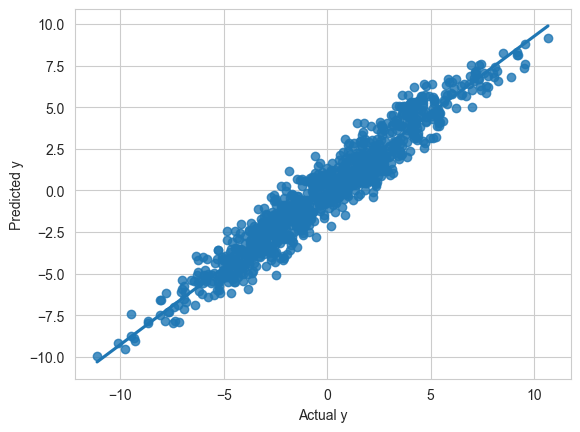

In [26]:
predictions = net.predict(X=df[["x1", "x2"]])
sns.regplot(x=df.y, y=predictions, ci=None)
df = df.sort_values(by="y")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.show()